## Prediction of Selling price for used Cars by building a Machine learning model using Python. (Linear Regression & Lasso Regression)

**Problem Statement**:
* Prediction of Selling price of used Cars by using available dataset features like year of purchase, KM running, no. of owners, fuel type etc.

**Data Overview**:
The dataset contains information about used cars. This data is used for price prediction to exemplify the use of linear regression in Machine Learning. The columns are Name, year, selling price, km driven, fuel, seller type, transmission, owner.

**Source**: This dataset contains information about used cars listed on www.cardekho.com


**Model Building and Training:**
* This is a Regression dataset. We are building a model using Linear Regression & Lasso Regression. 
* ML algorithm is first trained using data that finds patterns in dataset.
* So,whenever we assign the new value to the ML algorithm, it can predict the selling price.



In [2]:
#IMPORTING THE LIBRARIES
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics


In [40]:
#DATA COLLECTION AND PROCESSING
car_dataset = pd.read_csv(r"C:\Nirzari\Project\Regression\reg dataset\CAR PRICE PREDICTION\car data.csv")

In [41]:
#inspecting the 1st 5 rows of data frame
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [42]:
#checking the number of rows and columns
car_dataset.shape

(301, 9)

In [43]:
#checking the info
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [44]:
#checking the statistical data
car_dataset.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [45]:
#checking the missing values
car_dataset.isnull().sum()


Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [47]:
#checking the distribution of categorical data
print(car_dataset.Fuel_Type.value_counts())
print(car_dataset.Seller_Type.value_counts())
print(car_dataset.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


In [59]:
#encoding the 'fuel' column
car_dataset.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2,}},inplace=True)

#encoding 'seller_type' column
car_dataset.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)

#encoding 'transmission' column
car_dataset.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [60]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [61]:
#Splitting the data into Training data and test data
X = car_dataset.drop(['Car_Name','Selling_Price'],axis=1)
Y = car_dataset['Selling_Price']

In [62]:
print(X)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [63]:
print(Y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


In [64]:
#TRAIN TEST SPLITTING
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1,random_state=2)

##### MODEL TRAINING
#### LINEAR Regression

In [65]:

#loading the linear regression model
lin_reg_model = LinearRegression()

In [66]:
lin_reg_model.fit(X_train,Y_train)

LinearRegression()

#### MODEL EVALUATION

In [67]:

#PREDICTION ON TRAINING DATA
training_data_prediction = lin_reg_model.predict(X_train)

In [68]:
#R Squared Error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.8799451660493698


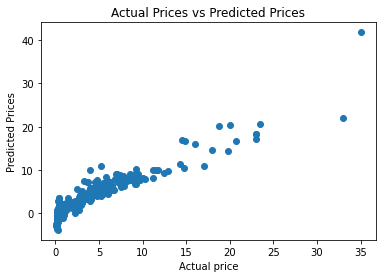

In [69]:
#Visualise the actual prices and predicted prices
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual price")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

In [70]:
#prediction on training data
test_data_prediction = lin_reg_model.predict(X_test)

In [72]:
#R SQUARED ERROR
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.8365766715026905


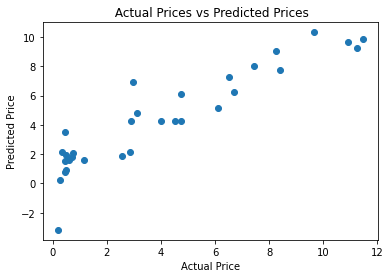

In [73]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

#### LASSO  Regression

In [74]:

#loading the lasso regression model
lass_reg_model = Lasso()

In [75]:
lass_reg_model.fit(X_train,Y_train)

Lasso()

#### Model Evaluation

In [76]:
#prediction on training data
training_data_prediction = lass_reg_model.predict(X_train)

In [78]:
#R squared Error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.8427856123435794


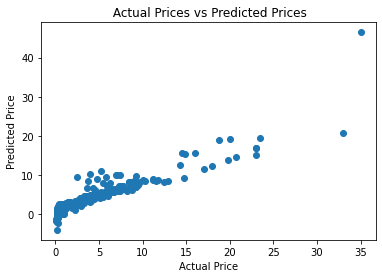

In [80]:
#visualise the actual prices and predicted prices
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [81]:
#Model Evaluation
#prediction on test data
test_data_prediction = lass_reg_model.predict(X_test)

In [82]:
#R squared Error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared Error : ", error_score)


R squared Error :  0.8709167941173195


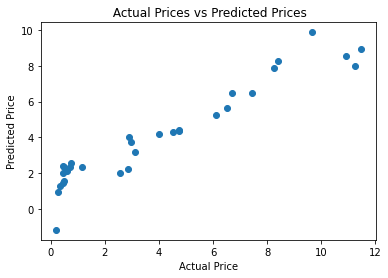

In [83]:
#visualise the actual prices and predicted prices
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

#### ITS A VERY GOOD FIT FOR A PARTICULAR MODEL.